***Hierarchical Clustering***:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp 
import seaborn as sns
%matplotlib inline
import lxml.html as lx
import requests
import requests_cache
import nltk
import nltk.corpus
import time
import re
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS

In [2]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [3]:
no_dup = pd.read_pickle("/Users/Troy/Downloads/all_nodup.txt")

In [4]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [5]:
size = 30       # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
sample = no_dup.groupby('source', as_index=False).apply(fn)
#sample = sample.reset_index()
#sample = sample.drop(["level_0", "level_1"], axis = 1)
#sample

In [6]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
text_list = sample["text"].tolist()
vec = TfidfVectorizer(tokenizer = tokenize_and_stem, 
                      stop_words = "english", 
                      sublinear_tf = True)
tfidf = vec.fit_transform(text_list)

In [7]:
tfidf

<90x5401 sparse matrix of type '<class 'numpy.float64'>'
	with 12789 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf)

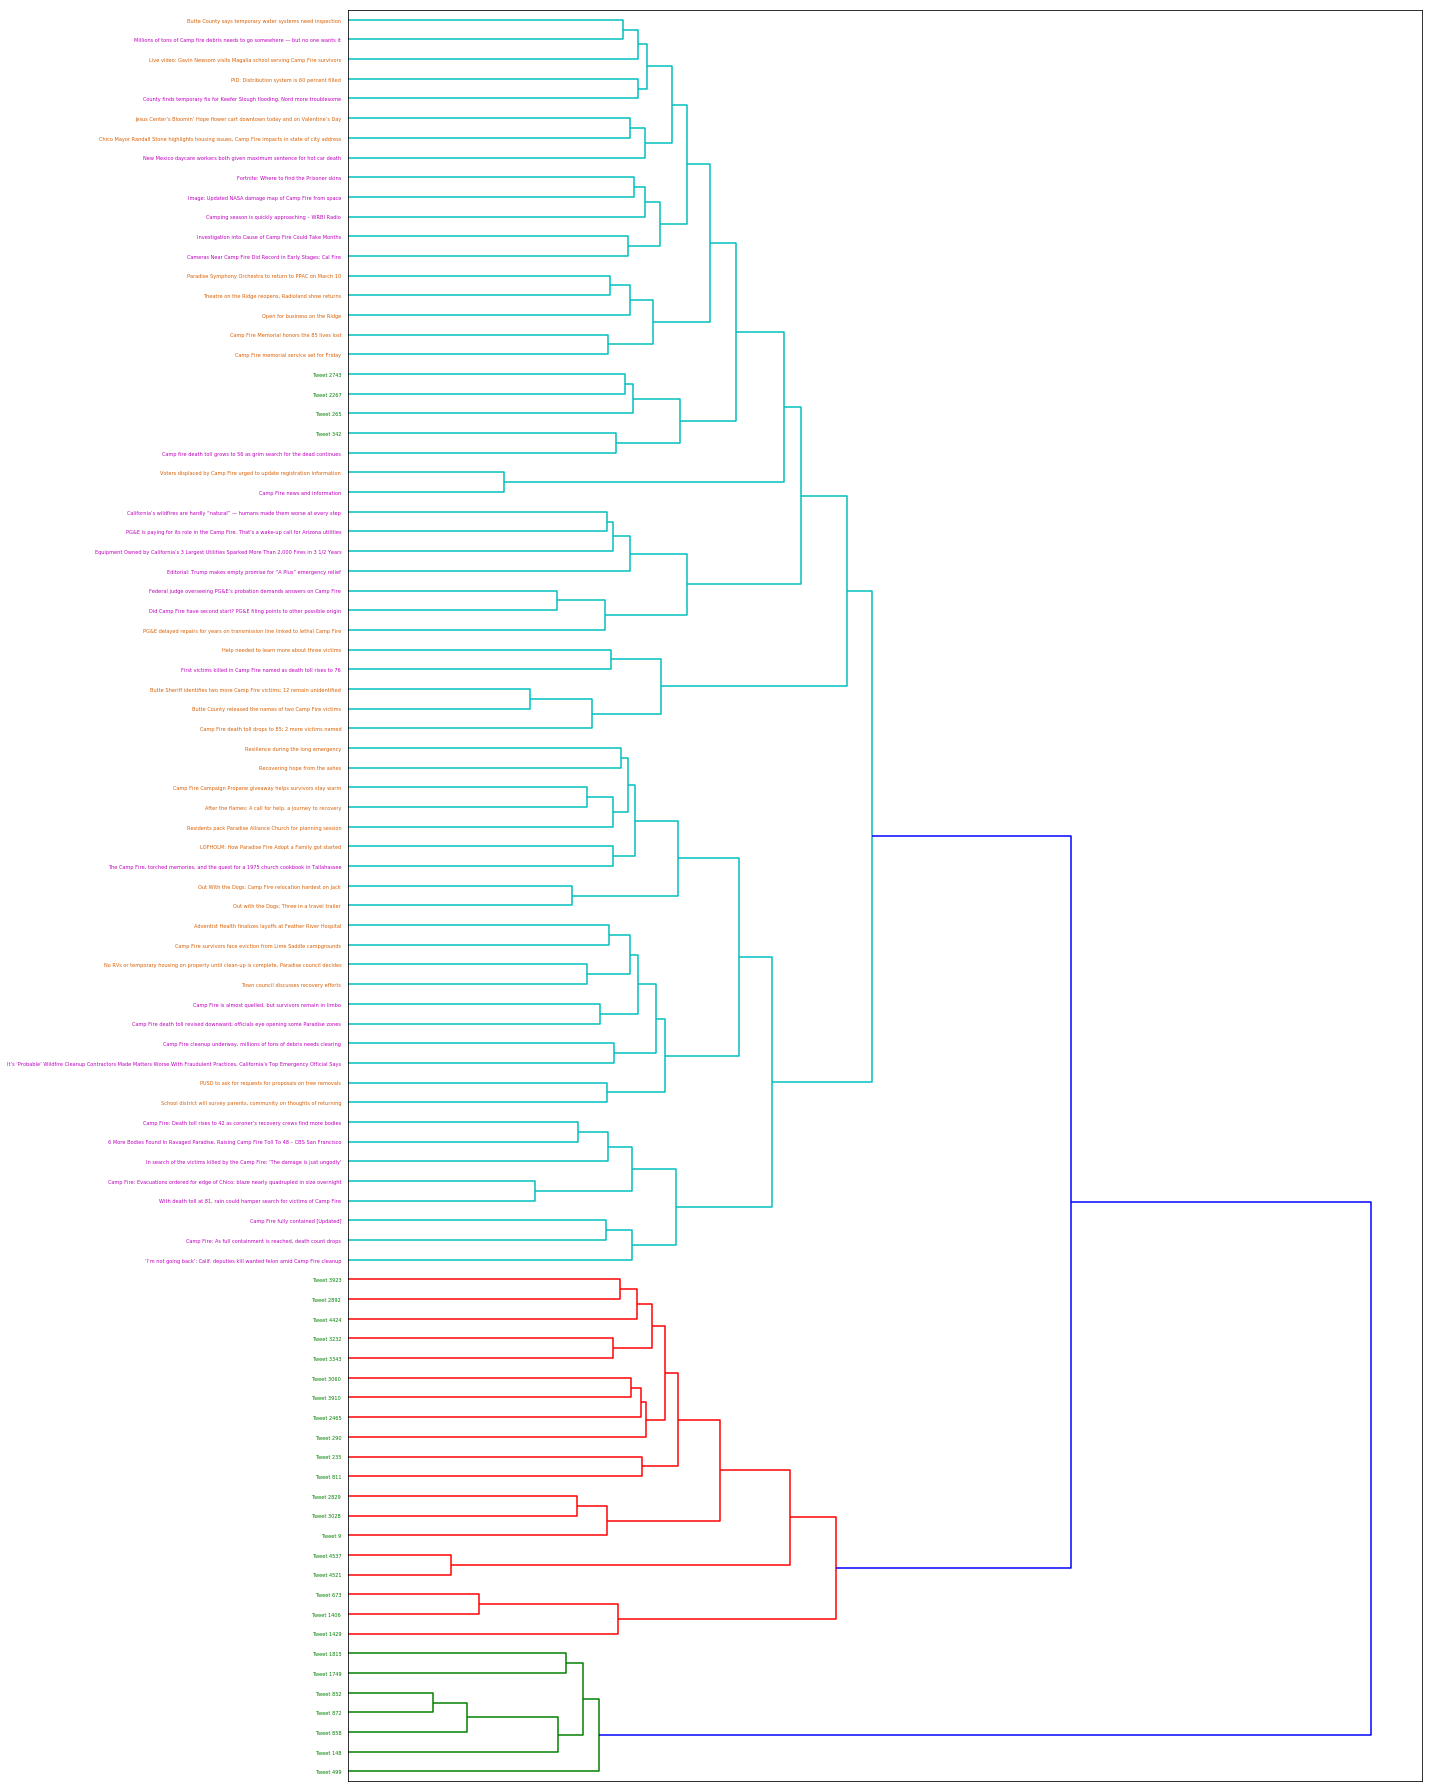

In [10]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(20, 25)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=sample["title"]);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tight_layout() #show plot with tight layout

label_colors = {'Google News': 'm', 'Twitter': 'g', 'Local': '#d95f02'}

ax = plt.gca()
ylbls = ax.get_ymajorticklabels()
for lbl in ylbls:
    category = sample[sample['title'] == lbl.get_text()]
   # print(list(category['source'])[0])
    lbl.set_color(label_colors[list(category['source'])[0]])
    
    ##main thing to pay attention to here is the color of the title rather than the actual title name itself

Reference: http://brandonrose.org/clustering